In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
ames = pd.read_csv('../data/ames_housing.csv')

In [2]:
ames.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Looking at what the columns are and which ones need fillna manipulation

In [3]:
ames.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

#### First we fix LotFrontage

In [4]:
naLotFrontage = ames[ames['LotFrontage'].notnull()]
np.corrcoef(naLotFrontage.LotFrontage,naLotFrontage.LotArea)

array([[1.        , 0.42609502],
       [0.42609502, 1.        ]])

#### I want to do an average as grouped by Lot Area since I feel like they are reasonably correlated

In [5]:
ames["LotFrontage"] = ames.groupby("LotArea").transform(lambda x: x.fillna(x.mean()))

#### Now to fix the columns that seem to be fine with None, No, 0

In [6]:
ames.Alley.value_counts()
#Seems like it describes the type of alley so those without a string don't have an alley

Grvl    50
Pave    41
Name: Alley, dtype: int64

In [7]:
ames.Alley = ames.Alley.fillna('None')

In [8]:
ames.Alley.value_counts()

None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

In [9]:
ames.MiscFeature.value_counts()

Shed    49
Gar2     2
Othr     2
TenC     1
Name: MiscFeature, dtype: int64

In [10]:
#Null probably means there is no Veneer
ames.MasVnrType = ames.MasVnrType.fillna('None')
ames.MasVnrArea = ames.MasVnrArea.fillna(0)
#Null probably means there is no basement
ames.BsmtQual = ames.BsmtQual.fillna('None')
ames.BsmtCond = ames.BsmtCond.fillna('None')
ames.BsmtExposure = ames.BsmtExposure.fillna('None')
ames.BsmtFinType1 = ames.BsmtFinType1.fillna('None')
ames.BsmtFinType2 = ames.BsmtFinType2.fillna('None')
#I'll fill the one missing Electrical with the most common Electrical value
ames.Electrical = ames.Electrical.fillna('SBrkr')
#Null probably means there is no Fireplace
ames.FireplaceQu = ames.FireplaceQu.fillna('None')
#Null probably means there is no garage
ames.GarageType = ames.GarageType.fillna('None')
ames.GarageFinish = ames.GarageFinish.fillna('None')
ames.GarageYrBlt = ames.GarageYrBlt.fillna(0)
ames.GarageQual = ames.GarageQual.fillna('None')
ames.GarageCond = ames.GarageCond.fillna('None')
#Null probably means there is no pool
ames.PoolQC = ames.PoolQC.fillna('None')
#Null probably means there is no fence
ames.Fence = ames.Fence.fillna('None')
#Null probably means there are none
ames.MiscFeature = ames.MiscFeature.fillna('None')

#### MoSold seems to be a mapping to a month, so it's really categorical not numerical

In [11]:
ames.MoSold.value_counts()

6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

In [12]:
ames = ames.replace({'MoSold' : {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                                 7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}})

In [13]:
ames.MoSold.value_counts()

Jun    253
Jul    234
May    204
Apr    141
Aug    122
Mar    106
Oct     89
Nov     79
Sep     63
Dec     59
Jan     58
Feb     52
Name: MoSold, dtype: int64

#### MSSubClass is also categorical, not numerical

In [14]:
ames = ames.replace({"MSSubClass" : {20 : "SubClass20", 30 : "SubClass30", 40 : "SubClass40", 45 : "SubClass45", 
                                       50 : "SubClass50", 60 : "SubClass60", 70 : "SubClass70", 75 : "SubClass75", 
                                       80 : "SubClass80", 85 : "SubClass85", 90 : "SubClass90", 120 : "SubClass120", 
                                       150 : "SubClass150", 160 : "SubClass160", 180 : "SubClass180", 190 : "SubClass190"}})

#### Lots of these variables are ordinal, so I want to order it by None, Poor, Fair, Typical, Good, Excellent 0-5
#### (For Basement, None, Unfinished --> Good Living Quarters)

In [15]:
ames = ames.replace({"Alley" : {"None" : 0, "Grvl" : 1, "Pave" : 2},
                       "BsmtCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "BsmtExposure" : {"None" : 0, "Mn" : 1, "Av": 2, "Gd" : 3},
                       "BsmtFinType1" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtFinType2" : {"None" : 0, "Unf" : 1, "LwQ": 2, "Rec" : 3, "BLQ" : 4, 
                                         "ALQ" : 5, "GLQ" : 6},
                       "BsmtQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd" : 4, "Ex" : 5},
                       "ExterCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "ExterQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA": 3, "Gd": 4, "Ex" : 5},
                       "FireplaceQu" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "Functional" : {"Sal" : 1, "Sev" : 2, "Maj2" : 3, "Maj1" : 4, "Mod": 5, 
                                       "Min2" : 6, "Min1" : 7, "Typ" : 8},
                       "GarageCond" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "GarageQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "HeatingQC" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "KitchenQual" : {"None" : 0, "Po" : 1, "Fa" : 2, "TA" : 3, "Gd" : 4, "Ex" : 5},
                       "LandSlope" : {"Sev" : 1, "Mod" : 2, "Gtl" : 3},
                       "LotShape" : {"IR3" : 1, "IR2" : 2, "IR1" : 3, "Reg" : 4},
                       "PavedDrive" : {"N" : 0, "P" : 1, "Y" : 2},
                       "PoolQC" : {"None" : 0, "Fa" : 1, "TA" : 2, "Gd" : 3, "Ex" : 4},
                       "Street" : {"Grvl" : 1, "Pave" : 2}})

#### Let's make some more features from what already exists

In [16]:
#Quality and Condition, when both are available, should tell us about that feature overall
#For Overall Score it's out of 20
ames['OverallScore'] = ames.OverallQual + ames.OverallCond
#For most others, it's out of 10
ames['GarageScore'] = ames.GarageQual + ames.GarageCond
ames['ExterScore'] = ames.ExterQual + ames.ExterCond
#Total Bathrooms (Basement + Above Grade)
ames['TotalBath'] = ames.BsmtFullBath + (0.5 * ames.BsmtHalfBath) + ames.FullBath + (0.5 * ames.HalfBath)
#Total Square Footage (Basement + Above Grade)
ames['TotalSF'] = ames.TotalBsmtSF + ames.GrLivArea

#### Time to look at the correlation of all our variables with the target (SalePrice)

In [ ]:
corr.SalePrice.sort_values(ascending = True).head(12)

In [42]:
ames['logSalePrice'] = np.log(ames.SalePrice)
corr = ames.corr()
corr.logSalePrice.sort_values(ascending = False).head(12)

logSalePrice    1.000000
SalePrice       0.948374
OverallQual     0.817184
logTotalSF      0.803591
TotalSF         0.773277
GrLivArea       0.700927
GarageCars      0.680625
ExterQual       0.678840
TotalBath       0.673011
KitchenQual     0.667893
GarageArea      0.650888
OverallScore    0.643117
Name: logSalePrice, dtype: float64

#### Looking at the distribution of key correlated variables of interest

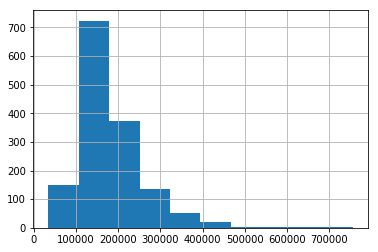

In [18]:
ames.SalePrice.hist()
#Our target variable seems to be very skewed. Let's transform it

The skew of Sale price before was 1.8828757597682129 
After transforming is 0.12133506220520406


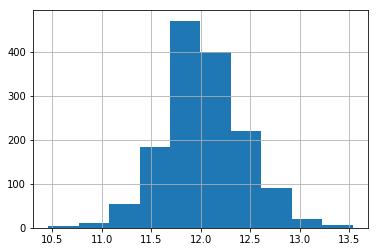

In [19]:
np.log(ames.SalePrice).hist()
print('The skew of Sale price before was', ames.SalePrice.skew(), '\nAfter transforming is', np.log(ames.SalePrice).skew())

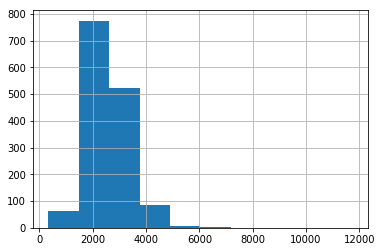

In [20]:
ames.TotalSF.hist()

The skew of Total SF before was 1.7780291853852757 
After transforming is -0.34475161727420883


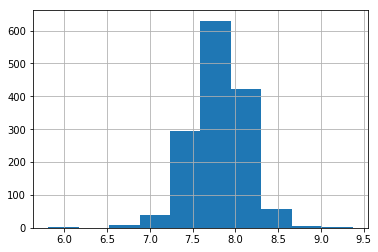

In [30]:
#Taking the natural log makes it look much more normally distributed; will need to use transformed version
np.log(ames.TotalSF).hist()
print('The skew of Total SF before was', ames.TotalSF.skew(), '\nAfter transforming is', np.log(ames.TotalSF).skew())
ames['logTotalSF'] = np.log(ames.TotalSF)

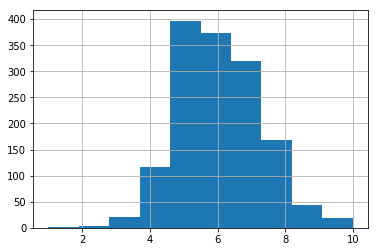

In [22]:
ames.OverallQual.hist()
#This looks fine

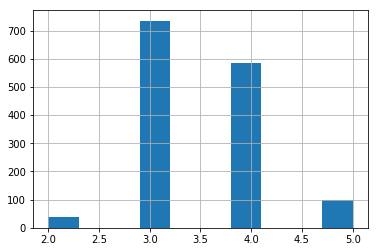

In [39]:
ames.KitchenQual.hist()

#### I'm curious as to what a model built only on an ordinal variable would look like

In [125]:
X = ames.ExterQual.reshape(-1,1)
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)
#it's bad. How are ordinal variables supposed to be used in regression???

MSE:  0.09054804045969683 
RMSE:  0.30091201448213534


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


#### Let's see how the model of just our most highly-correlated variable will be

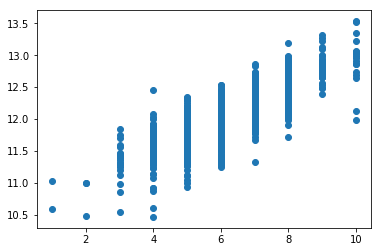

In [51]:
plt.scatter(ames.OverallQual,ames.logSalePrice)

In [124]:
X = ames.OverallQual.reshape(-1,1)
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.052418936318150415 
RMSE:  0.2289518209539955


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  """Entry point for launching an IPython kernel.


In [123]:
X = ames[['OverallQual','logTotalSF']]
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.03656414575093371 
RMSE:  0.1912175351554708


In [89]:
X = ames[['OverallQual','logTotalSF','TotalBath']]
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.033041732895888444 
RMSE:  0.18177385096841747


In [90]:
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual']]
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.025835866672084512 
RMSE:  0.16073539333975112


In [149]:
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','GarageCars']]
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.026716836190689472 
RMSE:  0.16345285617170927


In [148]:
#These are all of the top 10 most correlated variables that I'm comfortable using
#Variables like GrLivArea was used to make TotalSF so introducing it would make collinearity a problem, I think
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','ExterQual','GarageCars']]
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.022221275328454044 
RMSE:  0.1490680224879033


#### I want to move on to creating higher degree polynomial models now

In [46]:
from sklearn.preprocessing import PolynomialFeatures

In [105]:
model = Pipeline([('poly', PolynomialFeatures(2)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames.OverallQual.reshape(-1,1)
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.04939042837004558 
RMSE:  0.22223957426625343


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  This is separate from the ipykernel package so we can avoid doing imports until


In [104]:
#Increasing to three polynomials doesn't seem to be helpful
model = Pipeline([('poly', PolynomialFeatures(3)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames.OverallQual.reshape(-1,1)
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.05223013999202451 
RMSE:  0.22853914323814314


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  after removing the cwd from sys.path.


In [102]:
model = Pipeline([('poly', PolynomialFeatures(2)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames[['OverallQual','logTotalSF']]
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.031708822145963426 
RMSE:  0.17806971147829556


In [103]:
#Looks like increasing from 2 to 3 polynomial features doesn't make it better
model = Pipeline([('poly', PolynomialFeatures(3)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames[['OverallQual','logTotalSF']]
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse)

MSE:  0.03175178749925564 
RMSE:  0.17819031258532447


In [143]:
model = Pipeline([('poly', PolynomialFeatures(2)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','ExterQual','GarageCars']]
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse,'\nR^2: ',model.score(X_test,y_test))

MSE:  0.0250803646816427 
RMSE:  0.15836781453831678 
R^2:  0.8459369600961913


In [78]:
#second degree polynomials seem better than third degree
model = Pipeline([('poly', PolynomialFeatures(3)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','ExterQual','GarageCars']]
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse,'\nR^2',model.score(X_test,y_test))

MSE:  0.03539220259879582 
RMSE:  0.1881281547211789 
R^2 0.7960507482164475


In [122]:
model = Pipeline([('poly', PolynomialFeatures(2)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','GarageCars']]
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse,'\nR^2: ',model.score(X_test,y_test))

MSE:  0.022340869701418412 
RMSE:  0.14946862447155393 
R^2:  0.8694127782272315


#### It looks like the model that gave me the lowest RMSE were the following

In [136]:
model = Pipeline([('poly', PolynomialFeatures(2)),
                 ('linear', LinearRegression(fit_intercept=False))])
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','GarageCars']]
y = ames.logSalePrice
X_train, X_test, y_train, y_test = train_test_split(X,y)
model = model.fit(X_train,y_train)
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse,'\nR^2: ',model.score(X_test,y_test))

MSE:  0.01965445407342412 
RMSE:  0.14019434394234354 
R^2:  0.8620331144197952


In [160]:
X = ames[['OverallQual','logTotalSF','TotalBath','KitchenQual','ExterQual','GarageCars']]
y = np.log(ames.SalePrice)
X_train, X_test, y_train, y_test = train_test_split(X,y)
lr = LinearRegression()
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)
mse = mean_squared_error(y_test, predictions)
rmse = np.sqrt(mse)
print('MSE: ',mse,'\nRMSE: ',rmse,'\nR^2: ',lr.score(X_test,y_test))

MSE:  0.019674681910197493 
RMSE:  0.14026646751878188 
R^2:  0.8773160613639318
